# Time Modelling Tests

Brendan Smithyman | February, 2016

Test for solvers, plotting wavefields and outputting to `.utout`.

In [1]:
import os
import sys

sys.path.append('../../')

import numpy as np
from pygeo.segyread import SEGYFile
from pygeo.fullpy import readini
# from pymatsolver import MumpsSolver
from zephyr.backend import MiniZephyrHD, EurusHD, SparseKaiserSource
from zephyr.middleware import Helm2DViscoProblem, Helm2DSurvey, FullwvDatastore
from zephyr.middleware import dftreal, idftreal, dwavelet, TimeMachine

In [2]:
fds = FullwvDatastore('xhlayr')
systemConfig = fds.systemConfig

systemConfig.update({
    'Disc':     MiniZephyrHD,
#     'Solver':   MumpsSolver,
})

TM = TimeMachine(systemConfig)
STF = TM.fSource(TM.keuper())
systemConfig['sterms'] = STF.ravel()

problem = Helm2DViscoProblem(systemConfig)
survey  = Helm2DSurvey(systemConfig)
problem.pair(survey)

In [3]:
print('System Wrapper:\t%s'%problem.SystemWrapper)
print('Discretization:\t%s'%problem.system.Disc)
print('RHS Generator: \t%s'%survey.rhsGenerator.__class__)

System Wrapper:	<class 'zephyr.backend.distributors.ViscoMultiFreq'>
Discretization:	<class 'zephyr.backend.minizephyr.MiniZephyrHD'>
RHS Generator: 	<class 'zephyr.backend.source.SparseKaiserSource'>


In [4]:
uF = problem.fields()[:]['u']

/Users/brendan/anaconda/lib/python2.7/site-packages/numpy/lib/arraypad.py:1066: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.round(arr).astype(int)
/Users/brendan/anaconda/lib/python2.7/site-packages/numpy/lib/arraypad.py:1066: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.round(arr).astype(int)
/Users/brendan/anaconda/lib/python2.7/site-packages/numpy/lib/arraypad.py:1066: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.round(arr).astype(int)
/Users/brendan/anaconda/lib/python2.7/site-packages/numpy/lib/arraypad.py:1066: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.round(arr).astype(int)
/Users/brendan/anaconda/lib/python2.7/site-packages/numpy/lib/arraypad.py:1066: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.round(arr).astype(int)
/Users/brendan/anaconda/lib/python2.7/site-packages/num

In [5]:
uFs = uF[:,0,:]
res = TM.idft(uFs)

Populating the interactive namespace from numpy and matplotlib


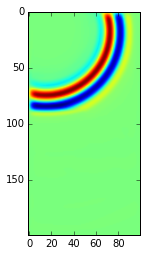

In [6]:
%pylab inline
imshow(res[:,25].reshape((200,100)))

In [7]:
%%time

print('Running %(nfreq)d frequencies and %(nsrc)s sources'%{'nfreq': survey.nfreq, 'nsrc': survey.nsrc})

dPred = survey.dpred().reshape((survey.nrec, survey.nsrc, survey.nfreq))

Running 50 frequencies and 86 sources
CPU times: user 2.97 s, sys: 2.11 s, total: 5.09 s
Wall time: 25.2 s


In [8]:
fds.utoutWrite(dPred)